In the last project, we explored the framework of calculus and used it to:

* understand the slope of linear functions
* understand the derivative (slope as a function) of nonlinear functions
* find extreme values in nonlinear functions

In this project, we'll focus on understanding linear functions. Specifically, we'll explore the framework of **linear algebra**, which provides a way to represent and understand the solutions to **systems of linear equations**. A system of linear equations consists of multiple, related functions with a common set of variables. The word **linear equation** is often used interchangeably with **linear function**. Many real world processes can be modeled using multiple, related linear equations. We'll start by exploring a concrete example of a linear system

# Optimal Salary Problem

Let's say we have to pick between 2 different job offers. The first job offer has a base weekly salary of 1000 dollars and pays 30 dollars an hour. We can represent this offer as $y = 1000 + 3x$, where y represents dollars earned that week and x represents hours worked that week. The second job offer has a base weekly salary of 100 dollars and pays 50 dollars an hour. We can represent this offer as $y = 100 + 50x$, where y also represents dollars earned that week and x also represents hours worked that week.

We want to understand which job offer is better. If we know exactly the amount of money we'd like to make each week (y), we can substitute that value into both equations and solve for x to identify which job will require us to work less hours. If we know exactly the number of hours we want to work each week (x), we can substitute that value into both equations and solve for y to identify which job will make us more money for the same amount of hours worked.

Instead, if we want to understand:

* At what number of hours worked can we expect to make the same amount of money at either job?
* How many hours do we have to work to make more money at the first job than the second job?

To answer the first question, we need to find the  value where both the  values are equivalent. Once we know where they intersect, we can easily find out the answer to the second question.

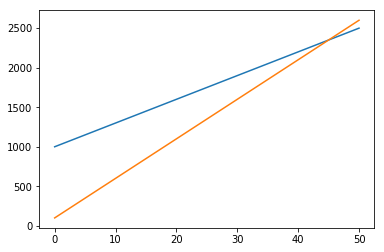

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,50,1000)
y1 = 30*x +1000
y2 = 50*x + 100

plt.plot(x,y1)
plt.plot(x,y2)


We can tell from above graph that both functions intersect at somewhere near the point (45,2200).

This point where both equations intersect is known as a **solution** to the system, because substituting for x and y into both functions in the system makes both of them true. Said another way, plugging in the x value of the solution into both functions yields the same y value.

Because both functions share the same variables, we can represent one of the variables, say y, in terms of the other variable and solve for the x value. Then, we can substitute this x value into either equation to determine the y value. This process is known as **solving by elimination** or the **elimination method**.
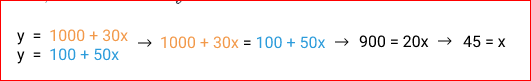

Now that we know that x = 45, we can substitute this into either equation to determine y. 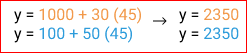

The solution to our system is (45,2350). This means that if we work exactly 45 hours a week, we'll make the same amount of money at either job: 2350.

While we can solve a linear system like this by hand using arithmetic, we can't use the same technique to solve much more complex systems. Many real world systems are modeled using many more than 2 variables and functions and solving by hand is unfeasible.

Those types of systems can be solved using **linear algebra** using a variation of arithmetic elimination called **Gaussian elimination**.

Linear algebra provides a way to represent a linear system compactly, known as a **matrix**, and a set of rules for manipulating that representation, also known as an **algebra**.

A matrix uses rows and columns to represent only the coefficients in a linear system and it's similar to the way data is represented in a spreadsheet or a dataframe. Before we can represent our system in a matrix, we need to rearrange each of our functions into the **general form**

We primarily explored linear functions in [slope-intercept form](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form):

$y=mx+b$

In linear algebra, we usually represent linear functions in the [general form](https://en.wikipedia.org/wiki/Linear_equation#General_.28or_standard.29_form):

$Ax+By = C$

In the general form, the variables and their coefficients are on the left side, while the constant term is on the right side. We can switch from point-slope form to the general form by rearranging the terms:

$mx-y = -b$

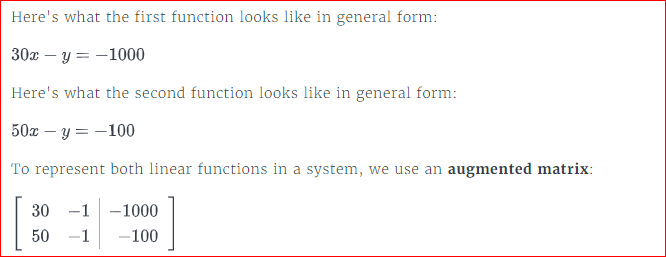

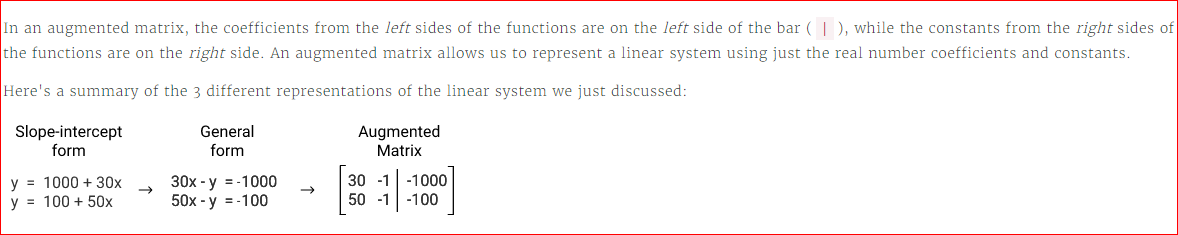

We'll walkthrough how to represent this augmented matrix in NumPy and we'll learn the rules of matrix manipulation and how to apply them to arrive at the system's solution.

To represent an augmented matrix, we can use the numpy.asarray() function and pass in each row as a list, from the top row to the bottom row.

Because we'll be performing addition, subtraction, multiplication, and division operations using the values in this matrix, we need to set the type to float32 to preserve precision.

Create a NumPy 2D array representation of our augmented matrix:
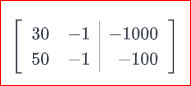

In [6]:
import numpy as np

matrix_one = np.asarray([[30,-1,-1000],
                        [50,-1,-100]], dtype = np.float32)
matrix_one

array([[   30.,    -1., -1000.],
       [   50.,    -1.,  -100.]], dtype=float32)

The important question now is, how do we arrive at the same solution we did earlier by arithmetic? We used arithmetic to calculate the solution to the system and represented it as a coordinate pair:(45,2350) . Here's how we represent the solution when we're working with the matrix representation:
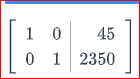

When we convert this matrix back into equations in the standard form, we'll notice that this corresponds to the same solution:
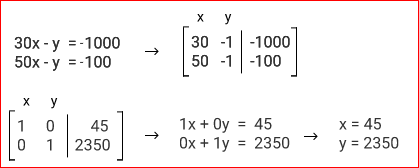

To solve a linear system, we need to perform a series of transformations to try to evolve the matrix into this form (where the solution is presented). Not all linear systems have solutions, however, and we'll explore this in further detail 

To preserve the relationships in the linear system, we can only use the following **row operations**: 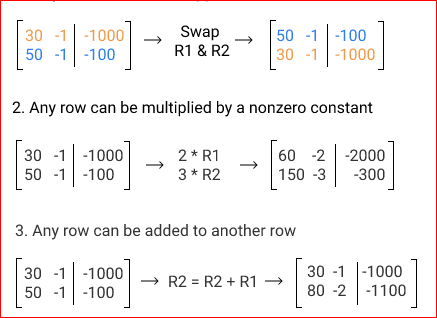

While these may seem new, these row operations are the same allowed operations we can perform when the functions are in equation form. 

let's practice performing these transformations in NumPy.

matrix =  np.asarray([
    [1, 3],
    [50, 2]], dtype=np.float32)


**To swap 2 rows in a NumPy ndarray object, we need to use double bracket notation to specify the row ordering change:**

* matrix = matrix[[1,0]]


**To multiply a row by a nonzero constant, we select the row, use the * operator to multiply all of the values by a scalar value, and then assign the transformed row back:**

* matrix[1] = 2*matrix[1]

**To add one row to another row, we need to add both rows then assign it back to the row we want to overwrite:**

* matrix[1] = matrix[1] + matrix[0]

**Lastly, we can combine and chain these rules to perform more complex row transformations:**

* matrix[1] = 0.5*matrix[2] + matrix[1] + matrix[3]

In [7]:
matrix_one = np.asarray([
    [30, -1, -500],
    [50, -1, -100]  
], dtype=np.float32)



matrix_one[0] = matrix_one[0]/30

To find the solutions of a matrix, there are 2 main steps we need to take. The first step is to rearrange the matrix into **echelon** form. In this form, the values on the diagonal locations are all equal to 1 and the values below the diagonal are all equal to 0.
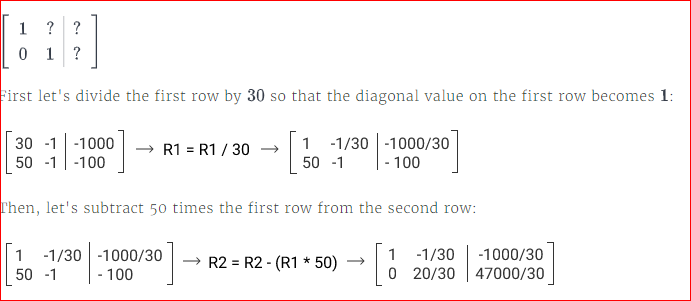

The second step is to rearrange the matrix into row reduced echelon form. This is the form that we mentioned earlier where the solution is exposed to us:
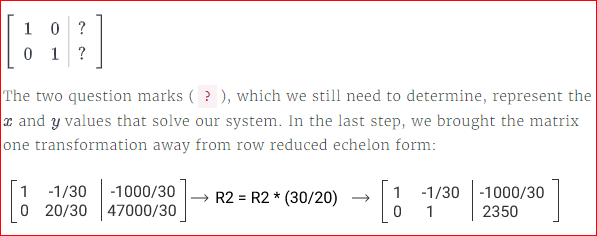

In [9]:
matrix_three = np.asarray([
    [1, -1/30, -1000/30],
    [0, 1, 2350]  
], dtype=np.float32)

matrix_three[0] += matrix_three[1]/30
matrix_three.astype(int)

array([[   1,    0,   45],
       [   0,    1, 2350]])

In most real world situations, the dependent variable y is connected to multiple independent variables, not just a single one x. To represent those functions, we'll need to work with a different version of the general form: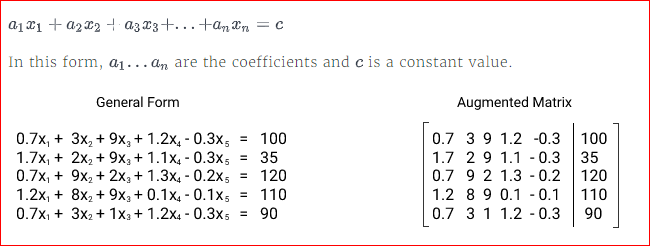

If we have a system with more than 3 variables, we can't visualize it easily. In addition, performing Gaussian elimination becomes much more painful to do. 